# Titanic

Com certeza, a maioria de vocês conhece a história por trás do naufrágio deste que seria o navio mais moderno do mundo para a época. Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, **seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.**

Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros, além de diversas atitudes irresponsáveis por parte da tripulação..

Obviamente, aqueles que sobreviveram à tragédia contaram com muita sorte, mas será que alguns grupos de passageiros não tiveram “mais sorte” que outros grupos? Será que crianças e mulheres realmente tiveram mais chances de sobreviver? Será que o Jack teve menos chances de escapar do seu destino trágico que a Rose, só pelo fato de ele ter embarcado na 3ª Classe?

## Exploração dos Dados

Definitivamente, a etapa mais importante do projeto. É aqui que você vai gastar entre 70-80% do tempo total. Muitas vezes, as perguntas e hipóteses iniciais conseguem ser respondidas apenas com uma Análise Exploratória bem feita. Caso seja necessário construir um modelo, o desempenho do mesmo estará diretamente ligado à qualidade dessa análise. Nesta etapa você irá:

- **Estudar cada atributo e suas características, tais como:**
    - Nome
    - Tipo (numérica, categórica, float, int, etc)
    - % de valores faltantes para cada coluna
    - Presença de ruído ou outliers
    - Tipo de distribuição (Gaussiana, uniforme, logarítmica,)
- **Identificar a variável alvo** 
- **Identificar correlações**
- **Visualizar os dados graficamente**

## Dicionário de Dados

- **PassengerId**: Número de identificação do passageiro
- **Survived**: Informa se o passageiro sobreviveu ao desastre
    - **0** = Não
    - **1** = Sim
- **Pclass**: Classe do bilhete
    - **1** = 1ª Classe
    - **2** = 2ª Classe
    - **3** = 3ª Classe
- **Name**: Nome do passageiro
- **Sex**: Sexo do passageiro
- **Age**: Idade do passageiro
- **SibSp**: Quantidade de cônjuges e irmãos a bordo
- **Parch**: Quantidade de pais e filhos a bordo
- **Ticket**: Número da passagem
- **Fare**: Preço da Passagem
- **Cabin**: Número da cabine do passageiro
- **Embarked**: Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

# Vamos começar oficialmente a entender os dados

Mas para isso, precisamos começar a organizar as coisas. 

**Importando as libs**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

**Suprimindo avisos de libs depreciadas**

In [2]:
# Suprimir avisos de deprecated
warnings.filterwarnings("ignore")

**Configurando o Seaborn para mostrar todas as colunas**

In [3]:
pd.options.display.max_columns = None

**Fazendo a leitura do arquivo que vamos usar para receber os dados**

In [4]:
arquivo = pd.read_csv("train.csv")

**Verificando as informações que temos**

In [5]:
arquivo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Quais os tipos de cada variável?**

Já sabemos o que cada coluna representa, então vamos dar uma olhada nas primeiras entradas e ver quais variáveis são numéricas e quais são categóricas.

**Qual a porcentagem de valores faltantes?**

A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna Age não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

In [6]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


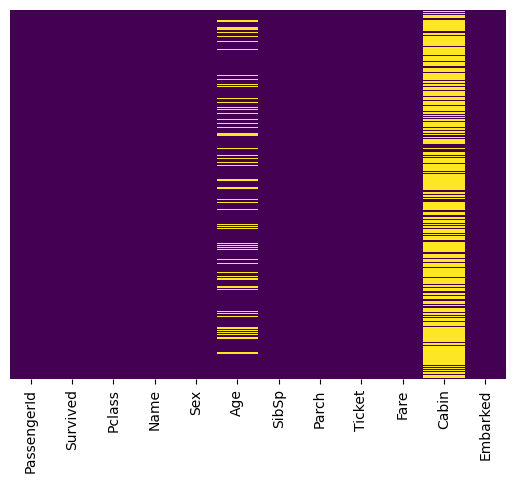

In [7]:
sns.heatmap(
    arquivo.isnull(),
    cbar=False,
    cmap="viridis",
    yticklabels=False
)
plt.show()

**Q1. Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?**

In [8]:
# verificando as dimensões do DataFrame
print("Colunas:\t{}\nRegistros:\t{}".format(arquivo.shape[1], arquivo.shape[0]))

Colunas:	12
Registros:	891


**Q2. Qual a porcentagem de valores faltantes?**

A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna Age não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

In [9]:
# ver a porcentagem valores faltantes
(arquivo.isnull().sum() / len(arquivo)).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

**Q3. Como é a distribuição estatística dos dados?**

In [10]:
arquivo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


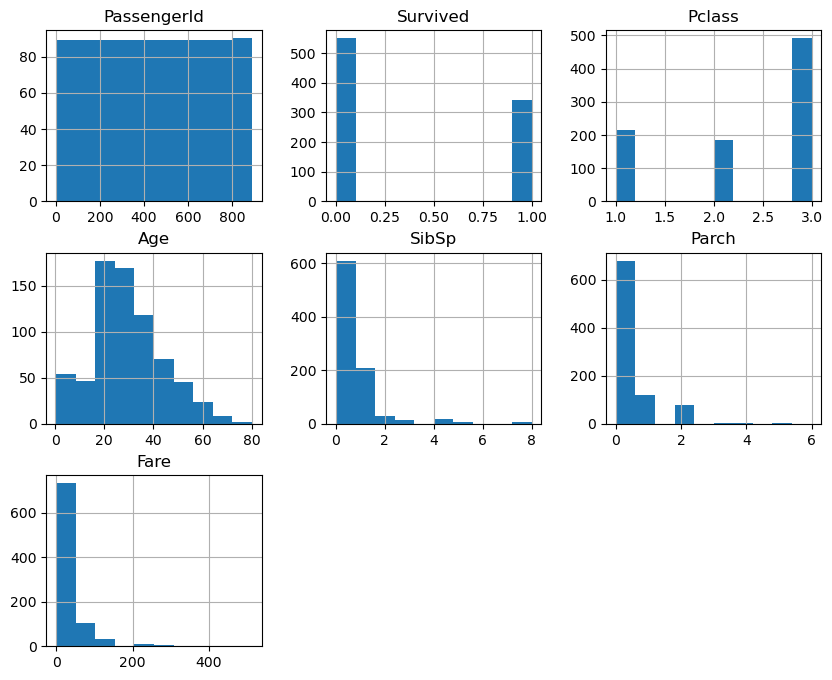

In [11]:
arquivo.hist(figsize=(10,8))
plt.show()

**Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??**

In [12]:
arquivo[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


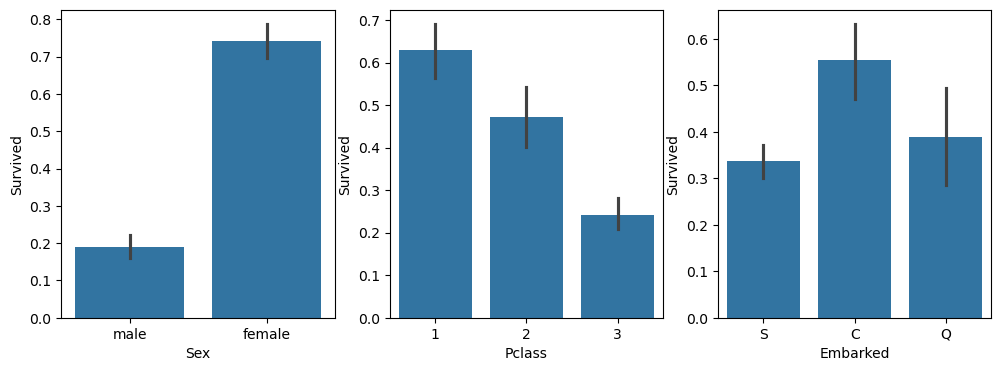

In [13]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=arquivo, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=arquivo, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=arquivo, ax=axis3);

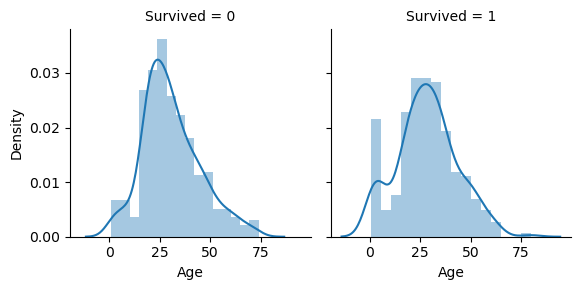

In [14]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(arquivo, col='Survived')
age_survived.map(sns.distplot, 'Age')

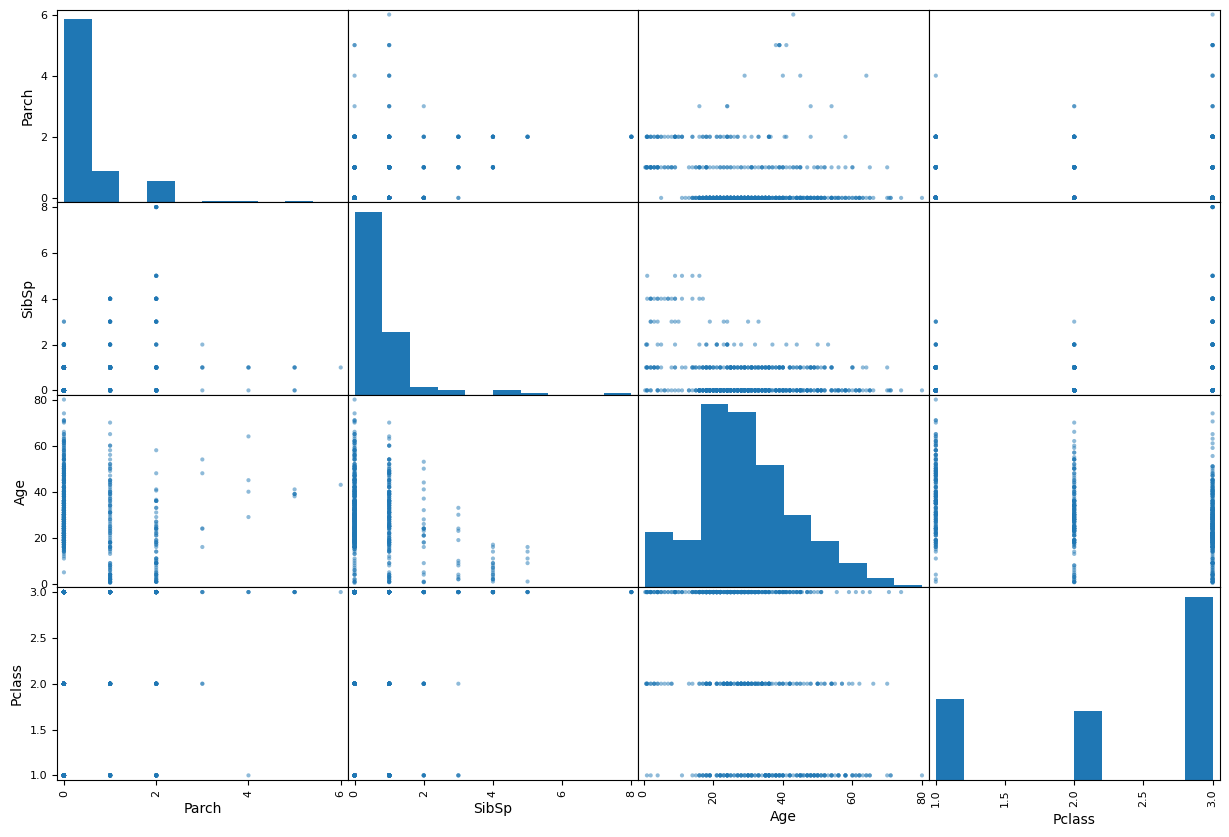

In [15]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(arquivo[columns], figsize=(15, 10));

Pouca gente sabe que o método df.describe() pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento include=['O'].

***ATENÇÃO, é a letra 'O', e não o número 0!***


In [16]:
arquivo.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Olhando esses dados a gente observa que:**

- Os valores para Name são únicos, um para cada pessoa;
- Não há missing values para Name e Sex;
- Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
- O Porto no qual embarcaram mais passageiros é o de S = Southampton.

## Tratando os valores faltantes

**Recuperando a idade das classes**

In [17]:
media_idades_por_classe = arquivo.groupby('Pclass')['Age'].mean().round(0).astype(int)

**Mostrando os dados recuperados**

In [18]:
print(media_idades_por_classe)

Pclass
1    38
2    30
3    25
Name: Age, dtype: int32


In [19]:
# Preenchendo valores ausentes com base na média da classe
arquivo['Age'] = arquivo.apply(
    lambda row: media_idades_por_classe[row['Pclass']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

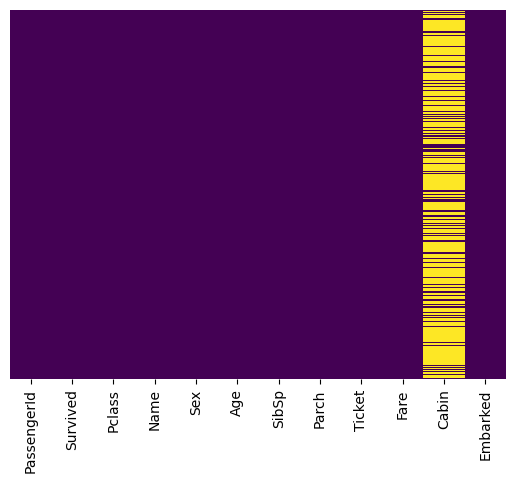

In [20]:
sns.heatmap(
    arquivo.isnull(),
    cbar=False,
    cmap="viridis",
    yticklabels=False
)
plt.show()

**Trocando as informações do Embarked**

In [21]:
# Criando o mapeamento dos textos
embarked_mapping = {
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}

In [22]:
# Substituindo as siglas pelos nomes completos
arquivo['Embarked'] = arquivo['Embarked'].replace(embarked_mapping)

In [23]:
arquivo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [24]:
arquivo.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [25]:
arquivo.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton


In [26]:
arquivo.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [27]:
# Substituindo valores nulos por uma das opções (exemplo: 'Southampton')
arquivo['Embarked'] = arquivo['Embarked'].fillna('Southampton')

In [28]:
arquivo.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

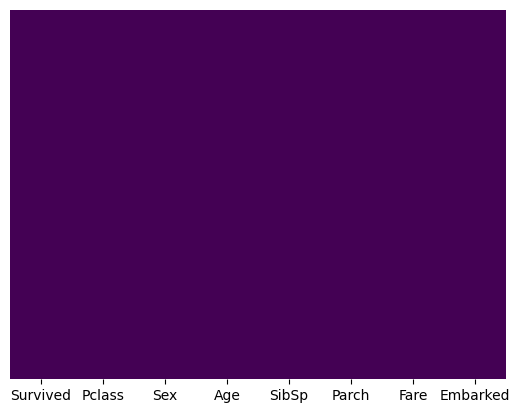

In [32]:
sns.heatmap(
    arquivo.isnull(),
    cbar=False,
    cmap="viridis",
    yticklabels=False
)
plt.show()

# Exportando o Dataset após a limpeza

In [30]:
# Exportando o DataFrame limpo para um arquivo CSV
arquivo.to_csv('dataset_limpo.csv', index=False)

print("Dataset exportado com sucesso!.")

Dataset exportado com sucesso!.
